In [47]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

from datetime import datetime
from numpy import percentile, mean, std


def openfile(csvfilename):
    li=[]

    for filename in [csvfilename]:
        df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)

    pd.set_option('display.max_columns', None)
    return df

def caldf(df):
    df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
    df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
    df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
    df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
    df['duration'] = pd.to_timedelta(df['duration'])
    
    df['init'] = df['Running'] - df['Pending']
    df['run'] = df['Completing'] - df['Running']
    df['final'] = df['Completed'] - df['Completing']
    
    df['start'] = df['Pending'][0]
    df['afterstart'] = df['Pending'] - df['start']
    return df

def performancedf(df):
    l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers','index']

    df_performance = []

    for model_name in df['benchmark'].unique():
           df_bench = df[(df['benchmark']==model_name)] # everybenchmark
           for nWorkers in df_bench.nWorkers.unique():
                df_senario = df_bench[df_bench.nWorkers == nWorkers]
                df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                      'model_time_mean' : mean(x['performance']),
                      'model_time_std' : std(x['performance']),
                  })).reset_index()
                df_performance.append(df_senario)

    df_performance = pd.concat(df_performance, axis=0)
    return df_performance

def timeslotdf(df):
    l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers','index']

    df_time = []

    for model_name in df['benchmark'].unique():
           df_bench = df[(df['benchmark']==model_name)] # everybenchmark
           for nWorkers in df_bench.nWorkers.unique():
                df_senario = df_bench[df_bench.nWorkers == nWorkers]
                df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                      'init_mean' : mean(x['init']),
                      'init_std' : std(x['init']),
                    'run_mean' : mean(x['run']),
                      'run_std' : std(x['run']),
                    'final_mean' : mean(x['final']),
                      'final_std' : std(x['final']),
                    'duration_mean' : mean(x['duration']),
                      'duration_std' : std(x['duration']),
                  })).reset_index()
                df_time.append(df_senario)
        
    df_time = pd.concat(df_time, axis=0)
    return df_time

def totaltimedf(df):
    l_gb = ['benchmark', 'nTasks']

    df_time = []

    for model_name in df['benchmark'].unique():
           df_bench = df[(df['benchmark']==model_name)] # everybenchmark
           for nTasks in df_bench.nTasks.unique():
                df_senario = df_bench[df_bench.nTasks == nTasks]
                df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                      'init_sum' : sum(x['init'].dt.total_seconds()),
                    'run_sum' : sum(x['run'].dt.total_seconds()),
                    'final_sum' : sum(x['final'].dt.total_seconds()),
                    'duration_sum' : sum(x['duration'].dt.total_seconds()),
                  })).reset_index()
                df_time.append(df_senario)
                
    df_time = pd.concat(df_time, axis=0)
    return df_time

In [49]:
dfbaseline = caldf(openfile("exp2-baseline.csv"))
dfbaseline['scenario'] = "baseline"
dfbaseline['index'] = dfbaseline.index
print(dfbaseline)
dfgranularity= caldf(openfile("exp2-granularity.csv"))
dfgranularity['scenario'] = "granularity"
dfgranularity['index'] = dfgranularity.index

           benchmark  times  nTasks  nNodes  nWorkers  \
0         hpccstream      9      16       3         3   
1            hpccfft      5      16       4         4   
2            hpccfft      7      16       4         4   
3         hpccptrans      5      16       3         3   
4         hpccptrans      1      16       3         3   
..               ...    ...     ...     ...       ...   
65           hpccfft      8      16       3         3   
66        hpccptrans      9      16       4         4   
67           hpccfft      9      16       3         3   
68  hpccrandomaccess      0      16       4         4   
69        hpccptrans      8      16       2         2   

                     Pending                   Running  \
0  2022-03-15 18:29:12+00:00 2022-03-15 18:29:16+00:00   
1  2022-03-15 18:30:12+00:00 2022-03-15 19:17:53+00:00   
2  2022-03-15 18:30:12+00:00 2022-03-15 19:21:57+00:00   
3  2022-03-15 18:31:12+00:00 2022-03-15 19:26:06+00:00   
4  2022-03-15 18:31:12+00

#  performance

In [25]:
df_performance = performancedf(dfbaseline)
df_performance = performancedf(dfgranularity)

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

def drawperformance(df_performance, df_performance1):
    for model_name in df_performance['benchmark'].unique():
        df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
        df_bench1 = df_performance1[(df_performance1['benchmark']==model_name)] # everybenchmark
#         print(df_bench)
        # plot grouped bar chart
        df_bench.plot(x='index',
                      y='model_time_mean',
                      yerr='model_time_std',
                        kind='bar',
                        stacked=False,
                        title=f"Grouped Bar Graph {model_name}")
        df_bench1.plot(x='index',
                      y='model_time_mean',
                      yerr='model_time_std',
                        kind='bar',
                        stacked=False,
                        title=f"Grouped Bar Graph {model_name}")

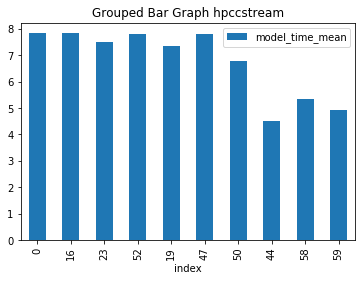

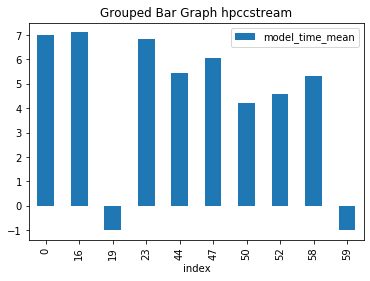

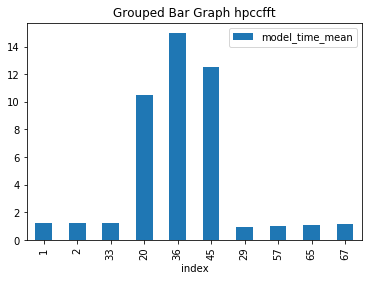

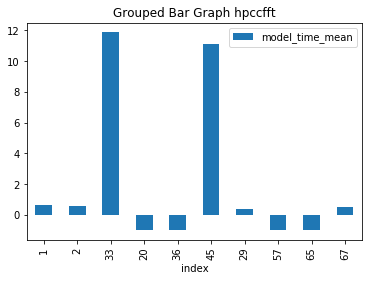

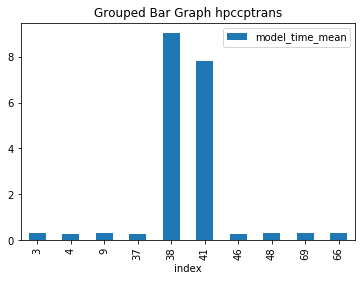

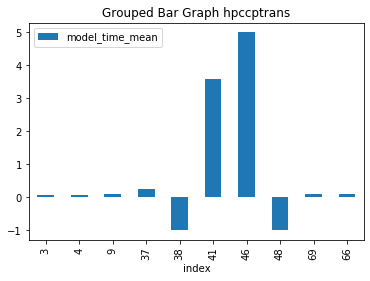

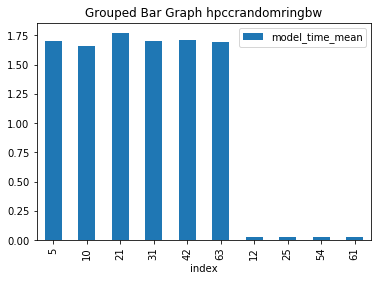

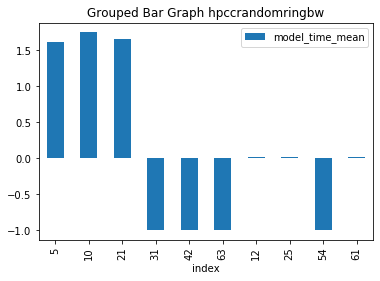

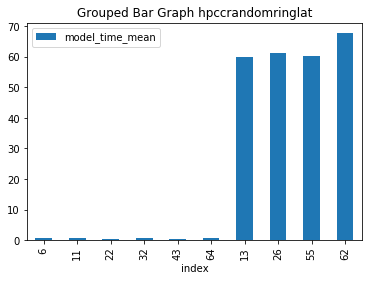

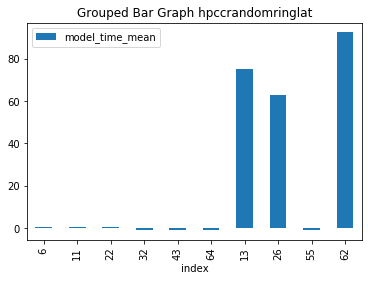

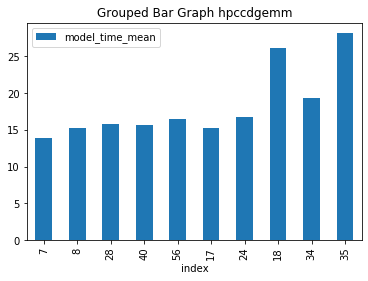

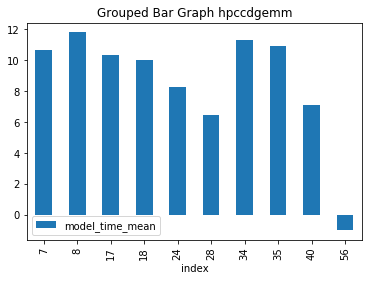

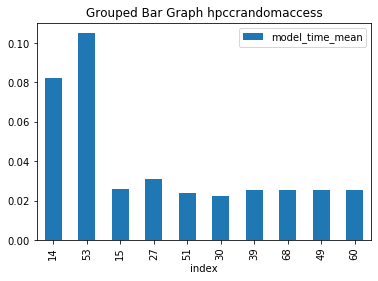

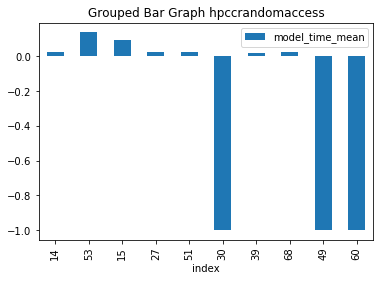

In [51]:
drawperformance(performancedf(dfbaseline),performancedf(dfgranularity))

#  time slot

<ipython-input-52-dbdb2ccec5d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-dbdb2ccec5d7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



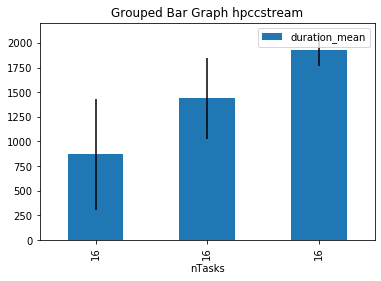

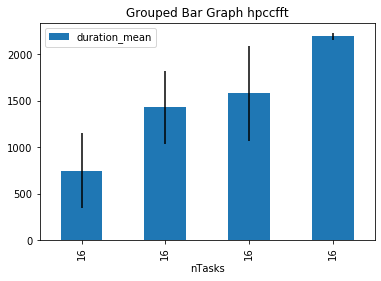

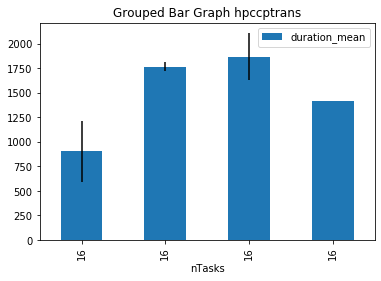

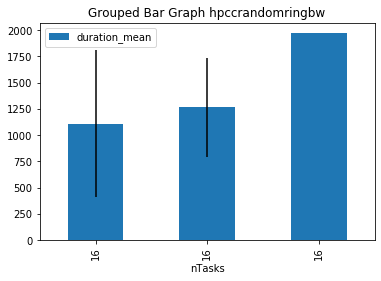

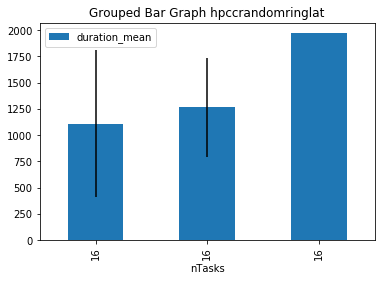

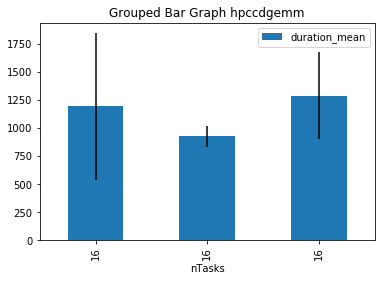

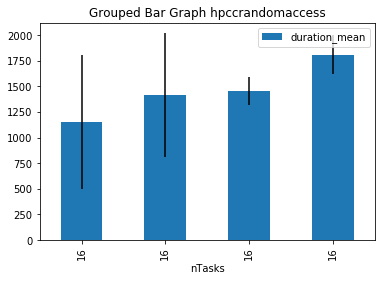

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

<ipython-input-55-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



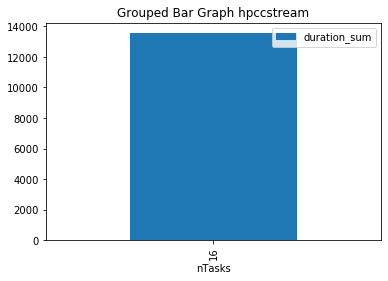

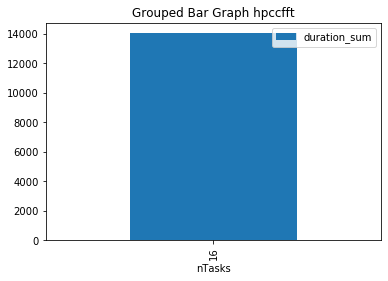

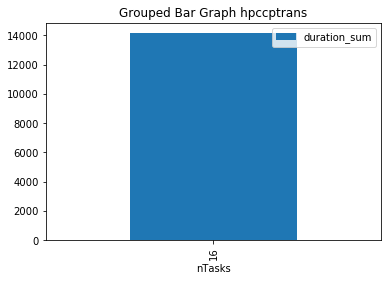

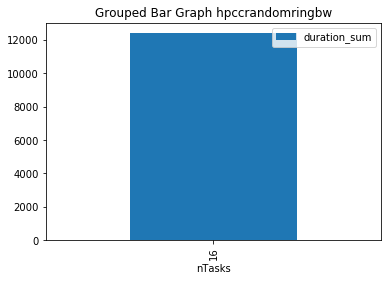

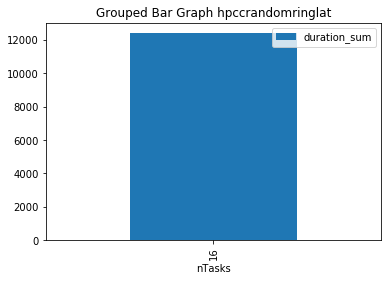

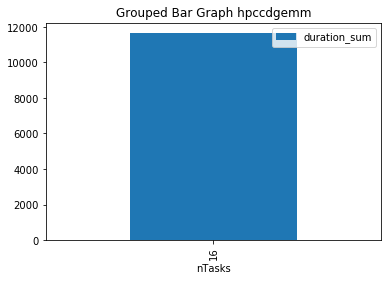

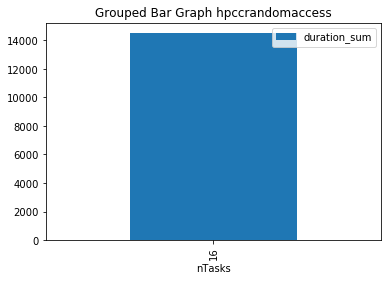

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [56]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,3,2022-03-16 12:43:09+00:00,2022-03-16 12:43:14+00:00,2022-03-16 12:44:50+00:00,2022-03-16 12:44:50+00:00,0 days 00:02:15.115410473,6.780750,0 days 00:00:05,0 days 00:01:36,0 days 00:00:00,2022-03-16 12:43:09+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-16 12:44:10+00:00,2022-03-16 12:44:16+00:00,2022-03-16 12:51:16+00:00,2022-03-16 12:51:18+00:00,0 days 00:07:44.261071035,0.569251,0 days 00:00:06,0 days 00:07:00,0 days 00:00:02,2022-03-16 12:43:09+00:00,0 days 00:01:01
2,hpccfft,7,16,4,4,2022-03-16 12:44:10+00:00,2022-03-16 12:44:16+00:00,2022-03-16 12:51:08+00:00,2022-03-16 12:51:09+00:00,0 days 00:07:34.261419200,0.534482,0 days 00:00:06,0 days 00:06:52,0 days 00:00:01,2022-03-16 12:43:09+00:00,0 days 00:01:01
3,hpccptrans,5,16,3,3,2022-03-16 12:45:10+00:00,2022-03-16 12:45:19+00:00,2022-03-16 12:57:37+00:00,2022-03-16 12:57:37+00:00,0 days 00:13:04.087104891,0.062497,0 days 00:00:09,0 days 00:12:18,0 days 00:00:00,2022-03-16 12:43:09+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-16 12:45:10+00:00,2022-03-16 12:45:19+00:00,2022-03-16 12:56:27+00:00,2022-03-16 12:56:28+00:00,0 days 00:11:54.245615692,0.081802,0 days 00:00:09,0 days 00:11:08,0 days 00:00:01,2022-03-16 12:43:09+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-16 12:52:33+00:00,2022-03-16 13:23:40+00:00,2022-03-16 13:29:06+00:00,2022-03-16 13:29:06+00:00,0 days 00:37:05.947029779,0.555867,0 days 00:31:07,0 days 00:05:26,0 days 00:00:00,2022-03-16 12:43:09+00:00,0 days 00:09:24
66,hpccptrans,9,16,4,4,2022-03-16 12:54:34+00:00,2022-03-16 13:11:28+00:00,2022-03-16 13:17:31+00:00,2022-03-16 13:17:31+00:00,0 days 00:23:40.123473267,0.197154,0 days 00:16:54,0 days 00:06:03,0 days 00:00:00,2022-03-16 12:43:09+00:00,0 days 00:11:25
67,hpccfft,9,16,3,3,2022-03-16 12:55:34+00:00,2022-03-16 13:26:01+00:00,2022-03-16 13:30:49+00:00,2022-03-16 13:30:49+00:00,0 days 00:35:50.141428735,0.569275,0 days 00:30:27,0 days 00:04:48,0 days 00:00:00,2022-03-16 12:43:09+00:00,0 days 00:12:25
68,hpccrandomaccess,0,16,4,4,2022-03-16 12:57:35+00:00,2022-03-16 13:14:57+00:00,2022-03-16 13:17:57+00:00,2022-03-16 13:17:57+00:00,0 days 00:21:00.083550822,0.022218,0 days 00:17:22,0 days 00:03:00,0 days 00:00:00,2022-03-16 12:43:09+00:00,0 days 00:14:26


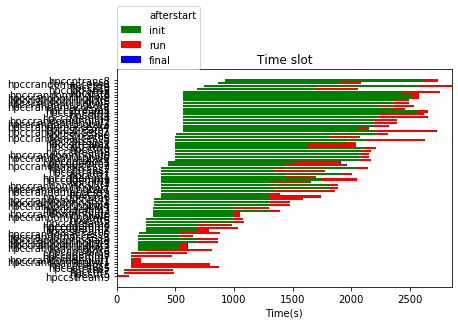

In [57]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
